In [1]:
#libraries
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# data reading

df = pd.read_csv(r'C:\Users\A S U S\Desktop\DS\Portfolio Project\Project2\glassdoor_jobs.csv')
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


what I'm going to do in data cleaning
1. salary parsing
2. company name only text
3. parsing job description
4. state field
5. age of the company


In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['job title', 'salary estimate', 'job description', 'rating',
       'company name', 'location', 'headquarters', 'size', 'founded',
       'type of ownership', 'industry', 'sector', 'revenue', 'competitors'],
      dtype='object')

In [4]:
pd.set_option('display.max_rows',None)
df

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


In [5]:
df = df[df['salary estimate']!= '-1']
df.shape

(742, 14)

In [6]:
#salary parsing

salary = df['salary estimate'].apply(lambda x: x.split('(')[0])
salary = salary.apply(lambda x: x.lower().replace('k','').replace('$','').replace('employer provided salary:','').replace('per hour',''))
df['min_salary'] = salary.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = salary.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary + df.max_salary) / 2
print(df.avg_salary.dtype)
df.head()


float64


,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5


In [7]:
# state field

df['job_state'] = df.location.apply(lambda x: x.split(',')[1])

# also let's check if the job state and the headquarters of the company is in the same state

df['same_state'] = df.apply(lambda x: 1 if x.location ==x.headquarters else 0,axis= 1) 

In [8]:
# age of the company 

current_year = int(datetime.today().strftime('%Y-%m-%d').split('-')[0])
df['company_age'] = df.founded.apply(lambda x: current_year - x if x > 1 else -1)



In [9]:
# parsing job description

#python
df['python'] = df['job description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
#r studio 
df['R'] = df['job description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

#spark 
df['spark'] = df['job description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

#aws 
df['aws'] = df['job description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

#excel
df['excel'] = df['job description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)



In [10]:
# df.to_csv('salary_data_cleaned.csv',index = False)

In [11]:
#### Job title and seniority 
		
####  Fix state Los Angeles 

####  Job description length 

####  Competitor count

#### hourly wage to annual 

#### remove new line from job title

In [12]:
# Job title and seniority 

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning engineer' in title.lower():
        return 'MLE'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'director' in title.lower():
        return 'director'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'na'
    
def seniority_level(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower():
        return 'sr'
    if 'jr' in title.lower() or 'junior' in title.lower() :
        return 'jr'
    else:
        return 'na'

In [13]:
df['job_simp'] = df['job title'].apply(title_simplifier)
df['seniority_level'] = df['job title'].apply(seniority_level)

In [14]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.lower().strip() != 'los angeles' else 'CA')
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [15]:
#  Job description length 

df['desc_len'] = df['job description'].apply(lambda x: len(x))
df['desc_len']

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
25      3760
26      3698
27      4420
28      4900
29      5015
30      3461
31      3883
32      3342
33      5045
34      2327
35      2161
36      1739
37      5000
38      3703
39      3555
40      1739
41      3053
43      1996
44      3833
45      3550
46      9120
48      3213
49      7286
50      3412
51      2682
52      2739
54      2915
55      4244
56      1629
57      4734
58      4448
59      3543
60      4203
61      5020
62      1786
63      3747
65      4804
66      1382
67      2933
68      4945
70      2493
72      1939
73      3081
75      8397
76      2306
77      2291
78      1886
79      2903
80      2653
81      4427
82      2609
83      4295
84      3405

In [16]:
pd.set_option('display.max_columns',None)
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,R,spark,aws,excel,job_simp,seniority_level,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,0,48,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,0,37,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL,1,11,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,WA,1,56,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,NY,1,23,1,0,0,0,1,data scientist,na,2728


In [17]:
# competitors count

df['num_competitors'] = df.competitors.apply(lambda x: len(x.split(',')) if x!= '-1' else 0)
df['num_competitors']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
25     3
26     0
27     0
28     0
29     0
30     0
31     3
32     0
33     0
34     0
35     3
36     0
37     1
38     0
39     0
40     0
41     3
43     0
44     0
45     3
46     3
48     0
49     3
50     0
51     3
52     3
54     0
55     3
56     0
57     3
58     0
59     0
60     3
61     2
62     0
63     3
65     0
66     0
67     0
68     3
70     3
72     0
73     0
75     4
76     0
77     0
78     0
79     0
80     0
81     3
82     3
83     0
84     0
85     0
86     0
87     3
88     0
89     0
90     3
91     3
92     0
93     0
94     3
95     0
96     0
97     0
99     0
101    3
102    0
104    0
105    0
106    3
107    3
108    3
109    3
110    0
112    0
113    3
116    3
117    3
118    3
119    0
120    3
122    0
123    3
124    3
125    2
1

In [18]:
#hourly wage to annual 

df.columns

Index(['job title', 'salary estimate', 'job description', 'rating',
       'company name', 'location', 'headquarters', 'size', 'founded',
       'type of ownership', 'industry', 'sector', 'revenue', 'competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state',
       'company_age', 'python', 'R', 'spark', 'aws', 'excel', 'job_simp',
       'seniority_level', 'desc_len', 'num_competitors'],
      dtype='object')

In [19]:

df['company name'] = df['company name'].apply(lambda x: x.lower().split("\n")[0])
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,R,spark,aws,excel,job_simp,seniority_level,desc_len,num_competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,tecolote research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,0,48,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,university of maryland medical system,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,0,37,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,knowbe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL,1,11,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,pnnl,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,WA,1,56,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,affinity solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,NY,1,23,1,0,0,0,1,data scientist,na,2728,3


# let's do some EDA

In [20]:
df.columns

Index(['job title', 'salary estimate', 'job description', 'rating',
       'company name', 'location', 'headquarters', 'size', 'founded',
       'type of ownership', 'industry', 'sector', 'revenue', 'competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state',
       'company_age', 'python', 'R', 'spark', 'aws', 'excel', 'job_simp',
       'seniority_level', 'desc_len', 'num_competitors'],
      dtype='object')

<AxesSubplot:>

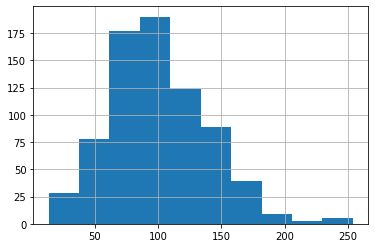

In [21]:
df.avg_salary.hist()

<AxesSubplot:>

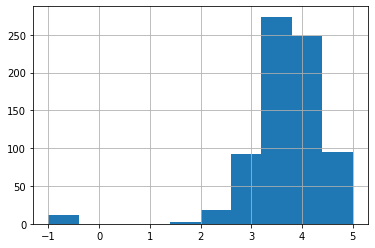

In [22]:
df.rating.hist()

<AxesSubplot:>

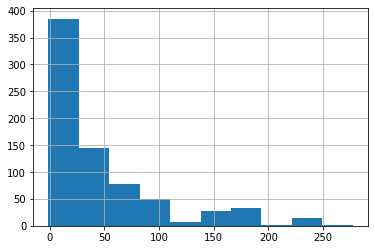

In [23]:
df.company_age.hist()

<AxesSubplot:>

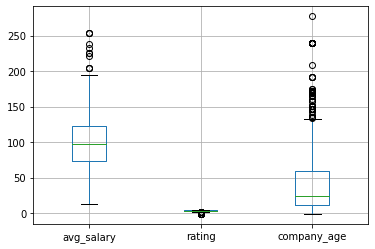

In [24]:
# let's see the outliers

df.boxplot(column=['avg_salary','rating','company_age'])

as this is not that much clear let's see one by one

<AxesSubplot:>

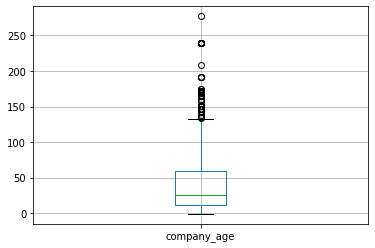

In [25]:
df.boxplot('company_age')

<AxesSubplot:>

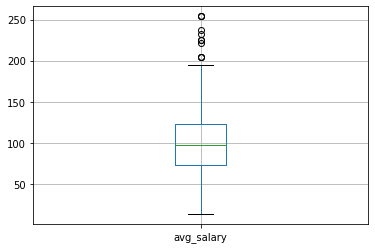

In [26]:
df.boxplot('avg_salary')

<AxesSubplot:>

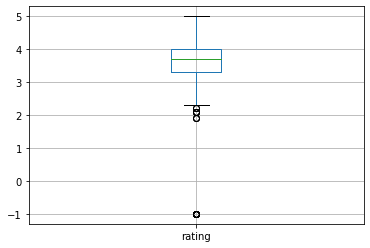

In [27]:
df.boxplot('rating')

In [28]:
corr = df[['avg_salary','rating','company_age','num_competitors']].corr()
corr

,avg_salary,rating,company_age,num_competitors
avg_salary,1.000000,0.013492,0.019574,0.093813
rating,0.013492,1.000000,0.023162,0.027190
company_age,0.019574,0.023162,1.000000,0.127482
num_competitors,0.093813,0.027190,0.127482,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

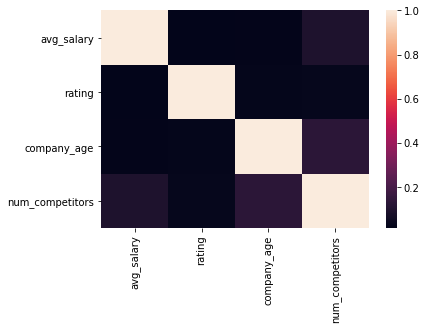

In [29]:
sns.heatmap(corr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

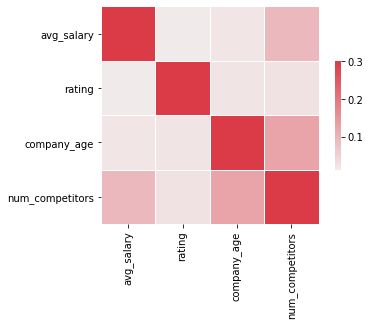

In [30]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
# let's have some look at categorical variables


cat_features = ['company name','location','headquarters','industry','sector','job_simp','type of ownership','size','revenue','job_state']

<IPython.core.display.Javascript object>

graph for company name total= 343


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

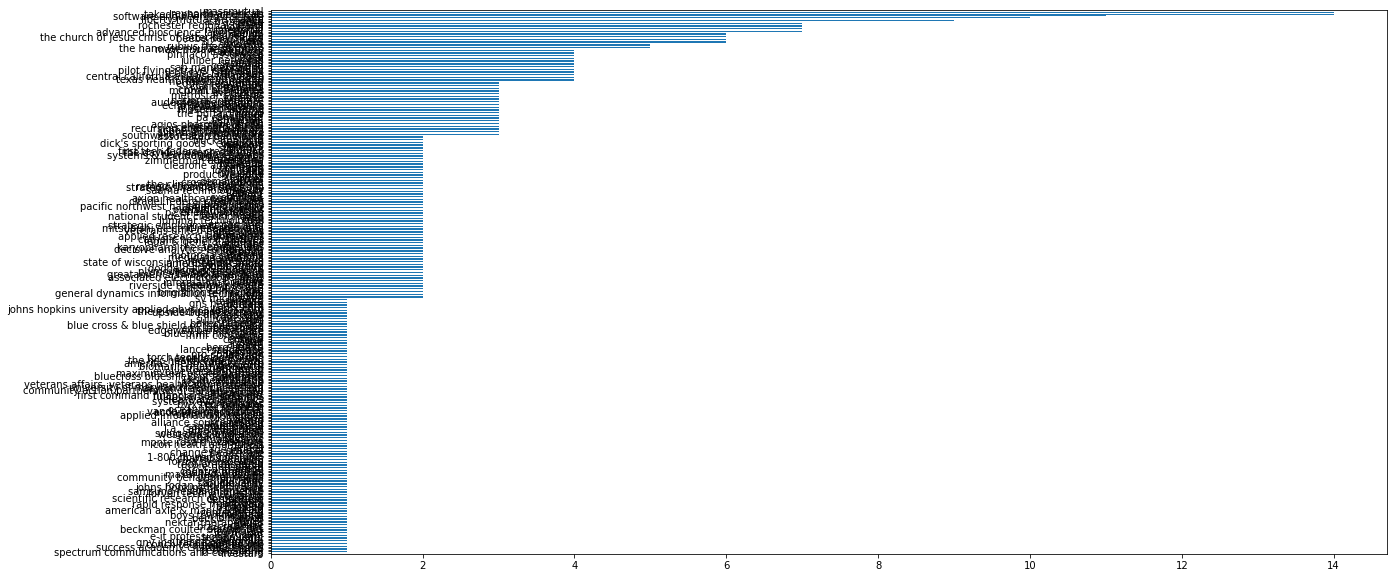

<IPython.core.display.Javascript object>

graph for location total= 200


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

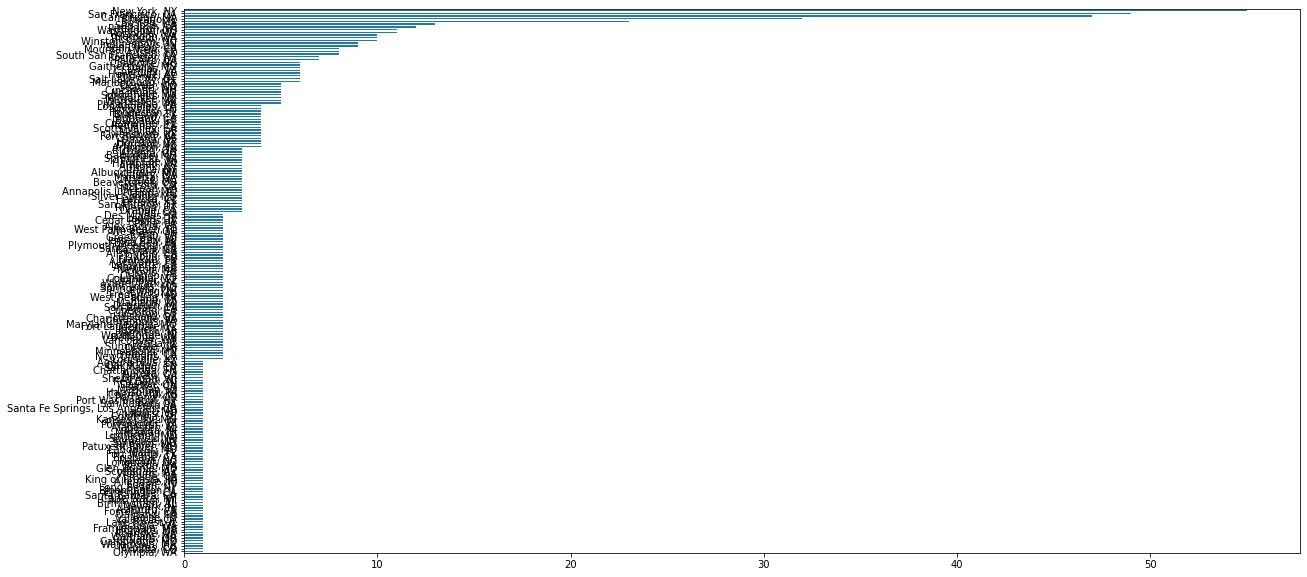

<IPython.core.display.Javascript object>

graph for headquarters total= 198


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

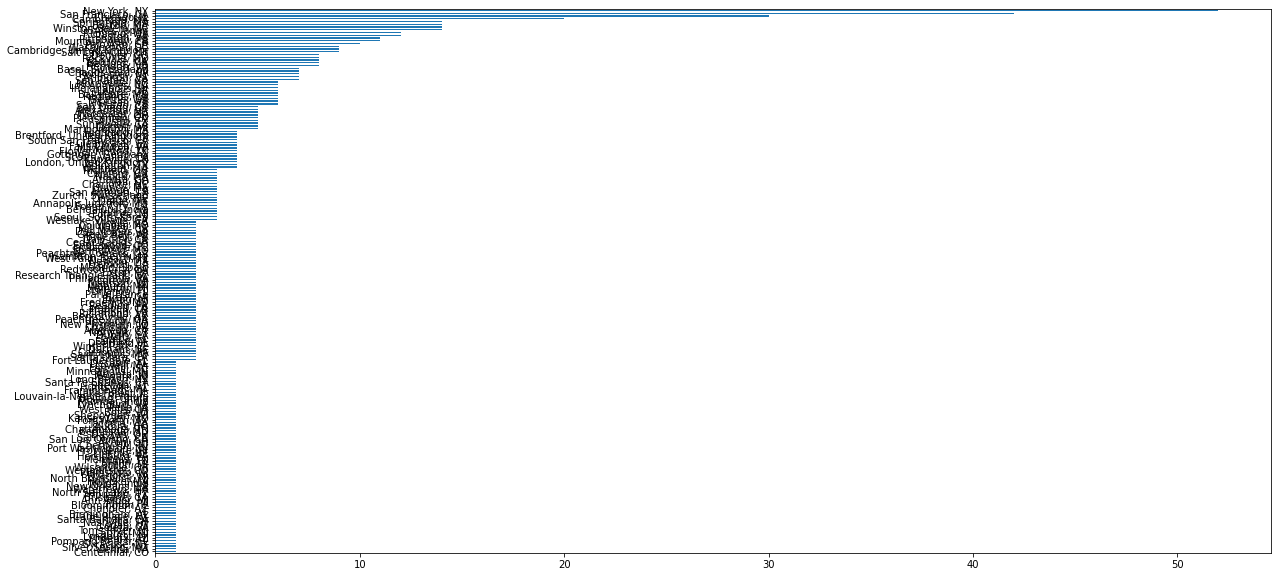

<IPython.core.display.Javascript object>

graph for industry total= 60


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

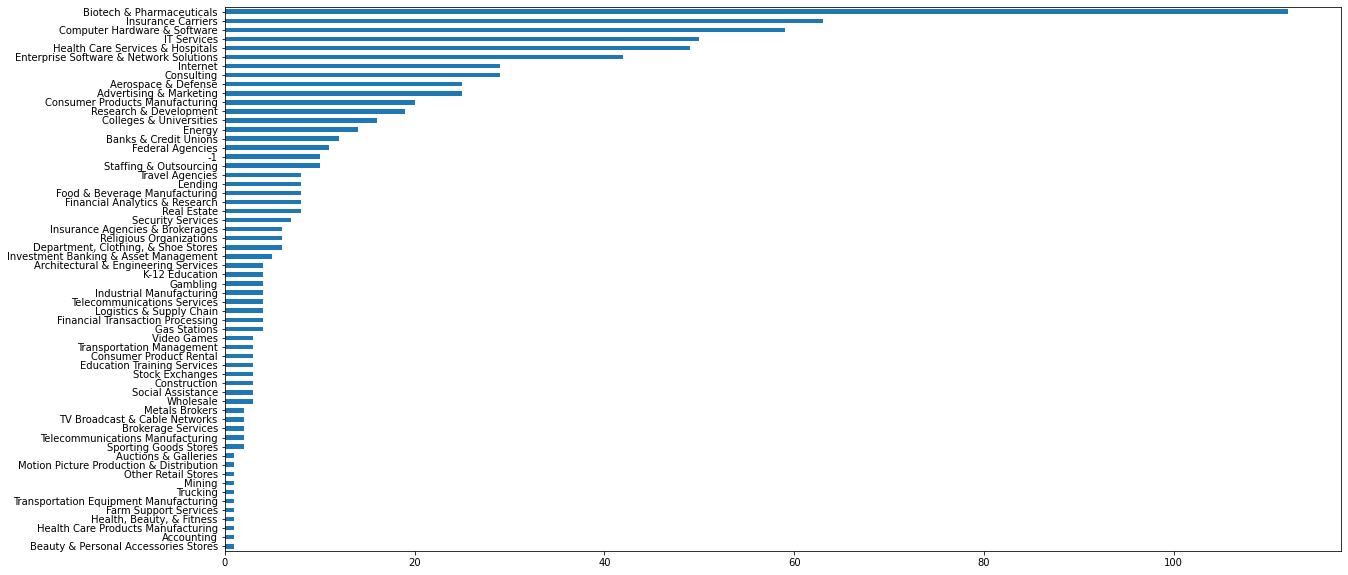

<IPython.core.display.Javascript object>

graph for sector total= 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

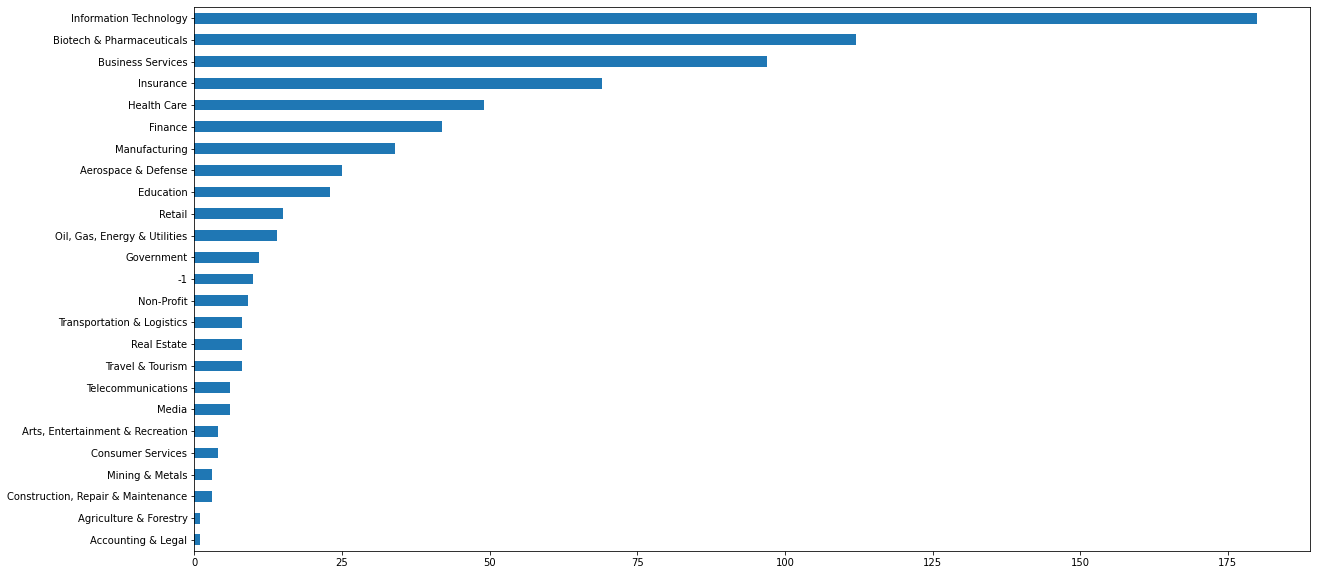

<IPython.core.display.Javascript object>

graph for job_simp total= 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

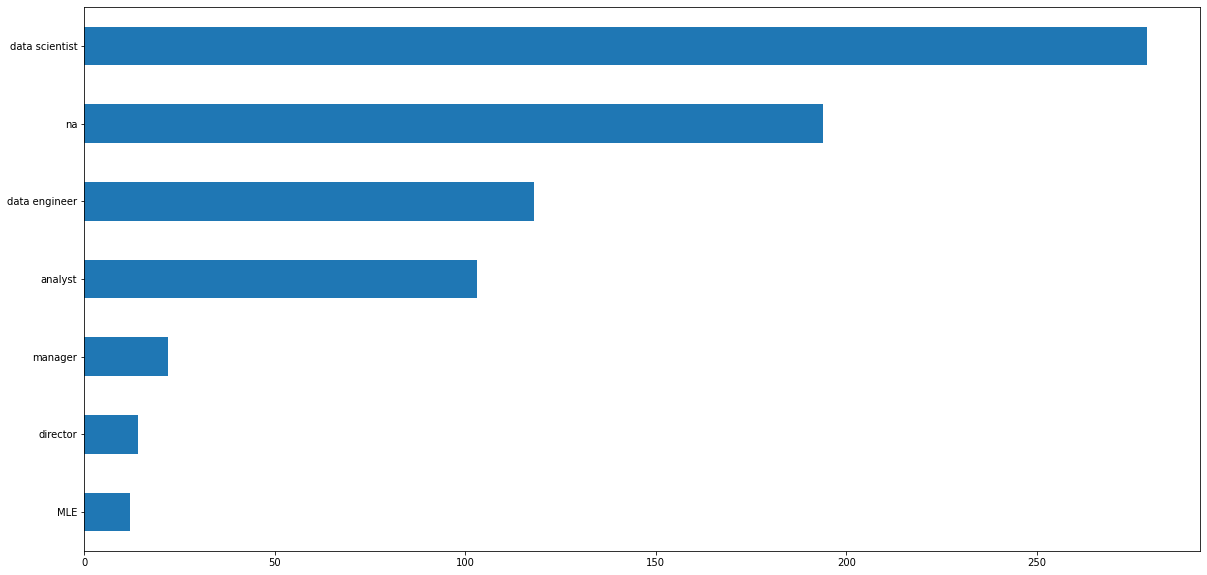

<IPython.core.display.Javascript object>

graph for type of ownership total= 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

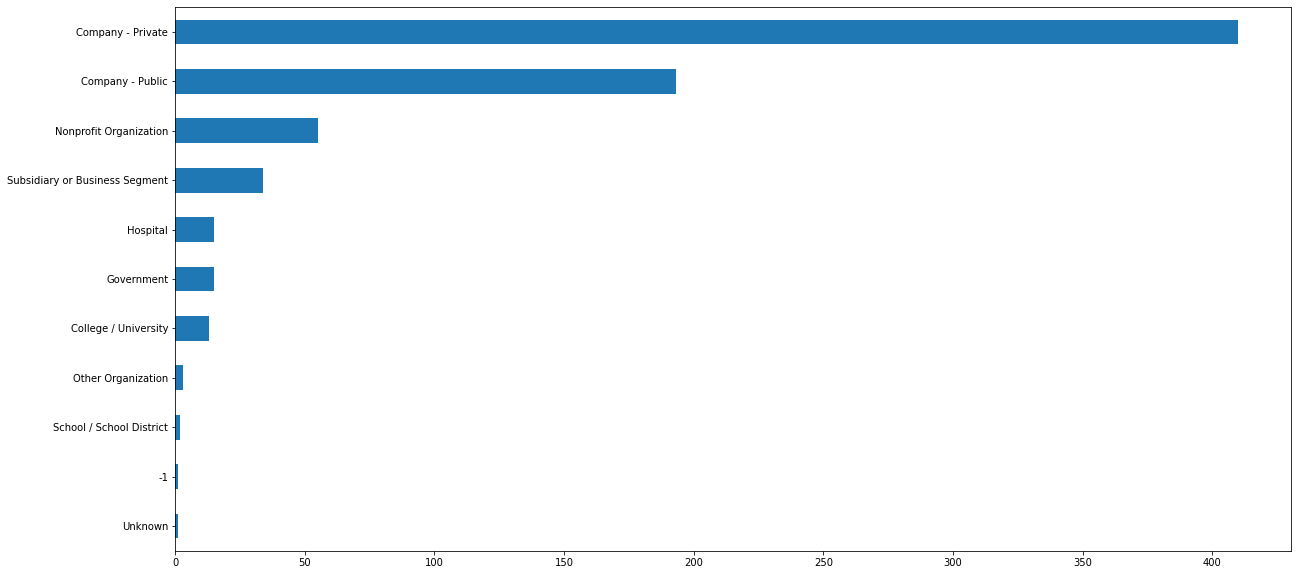

<IPython.core.display.Javascript object>

graph for size total= 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

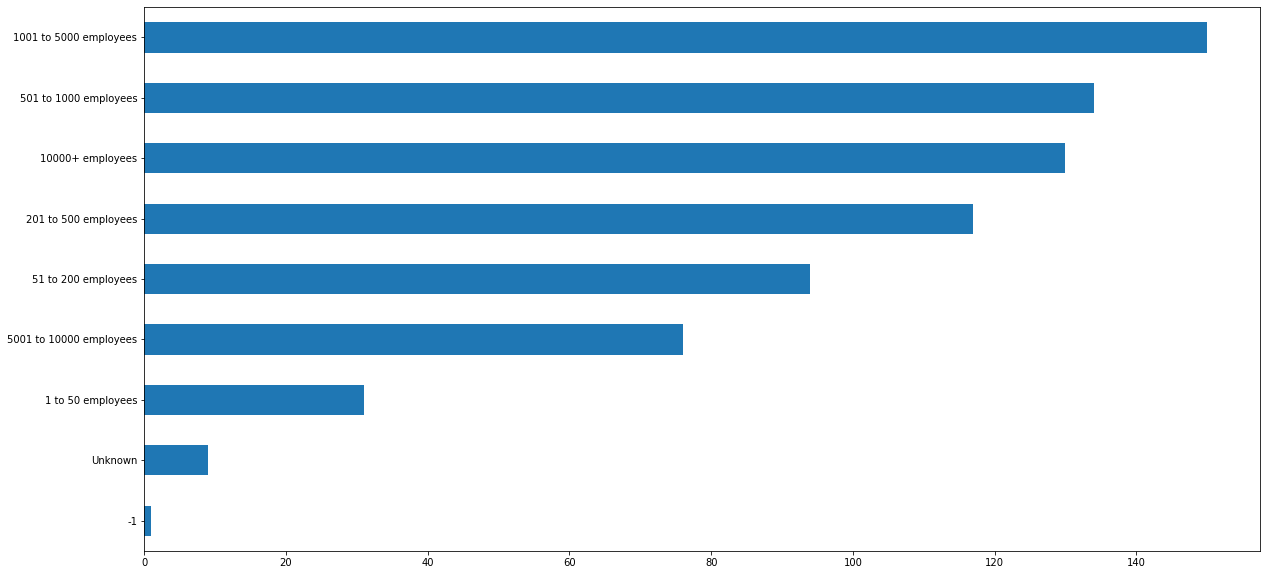

<IPython.core.display.Javascript object>

graph for revenue total= 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

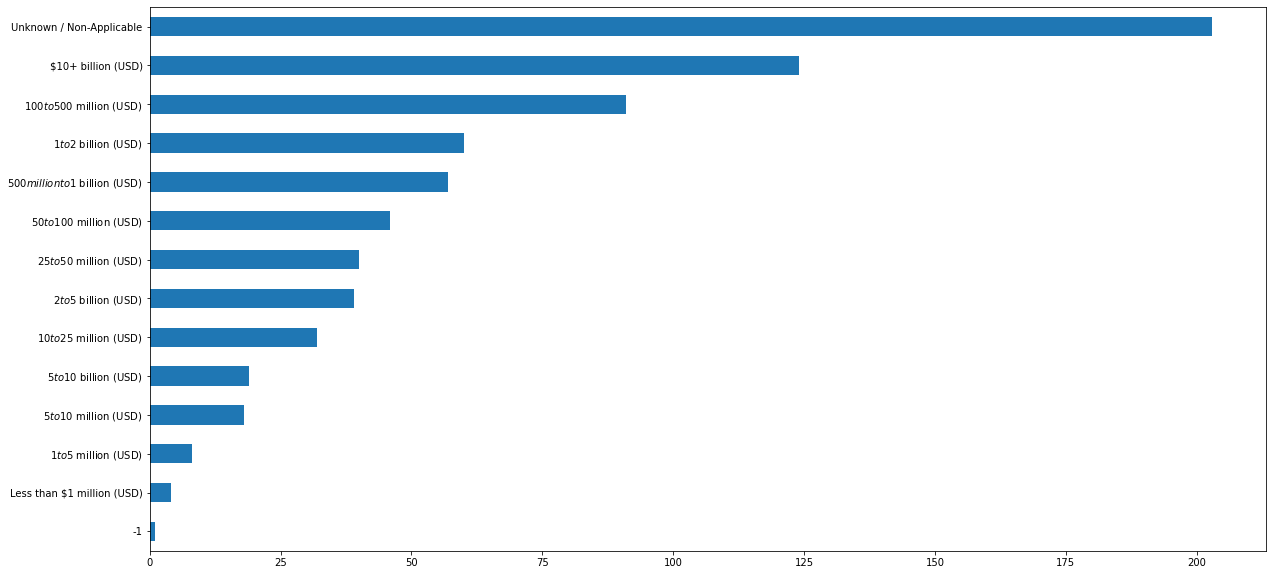

<IPython.core.display.Javascript object>

graph for job_state total= 37


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

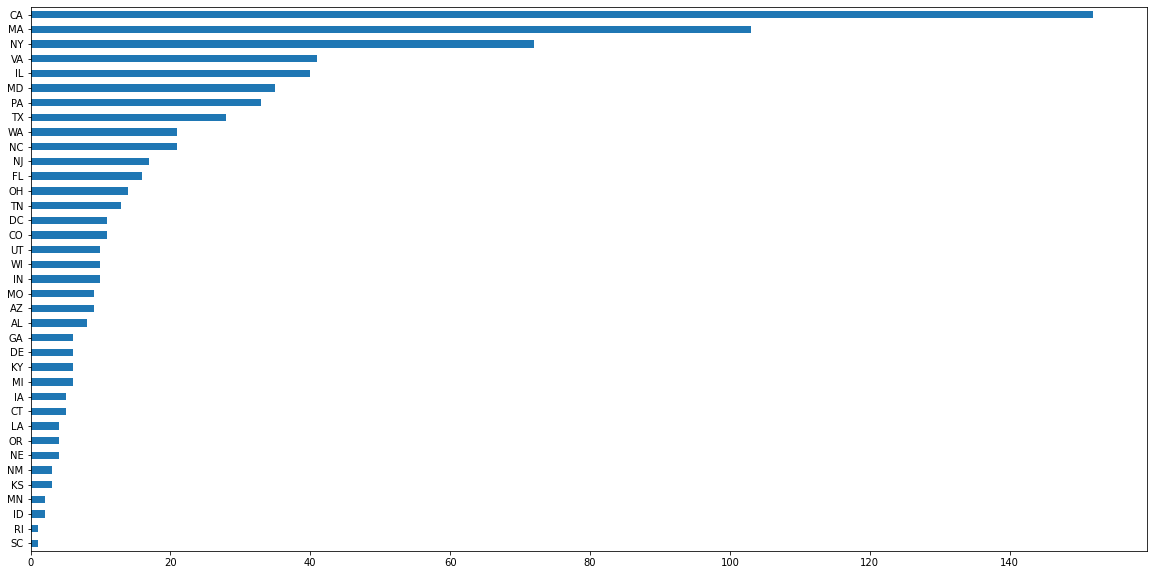

In [32]:
for feature in cat_features:
    plt.figure(figsize=(20,10))
    print(f'graph for {feature} total= {df[feature].nunique()}')
    df[feature].value_counts().sort_values(ascending=True).plot(kind='barh')
    plt.yticks(rotation=0)
    plt.show();

<IPython.core.display.Javascript object>

graph for company name total= 343


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

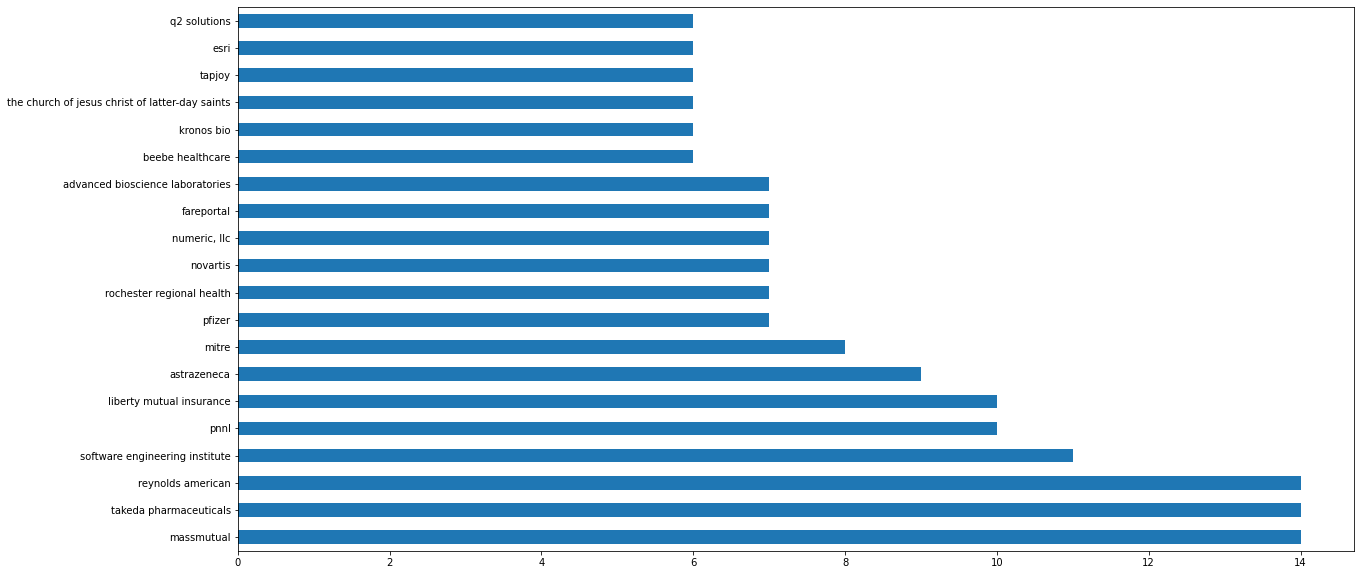

<IPython.core.display.Javascript object>

graph for location total= 200


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

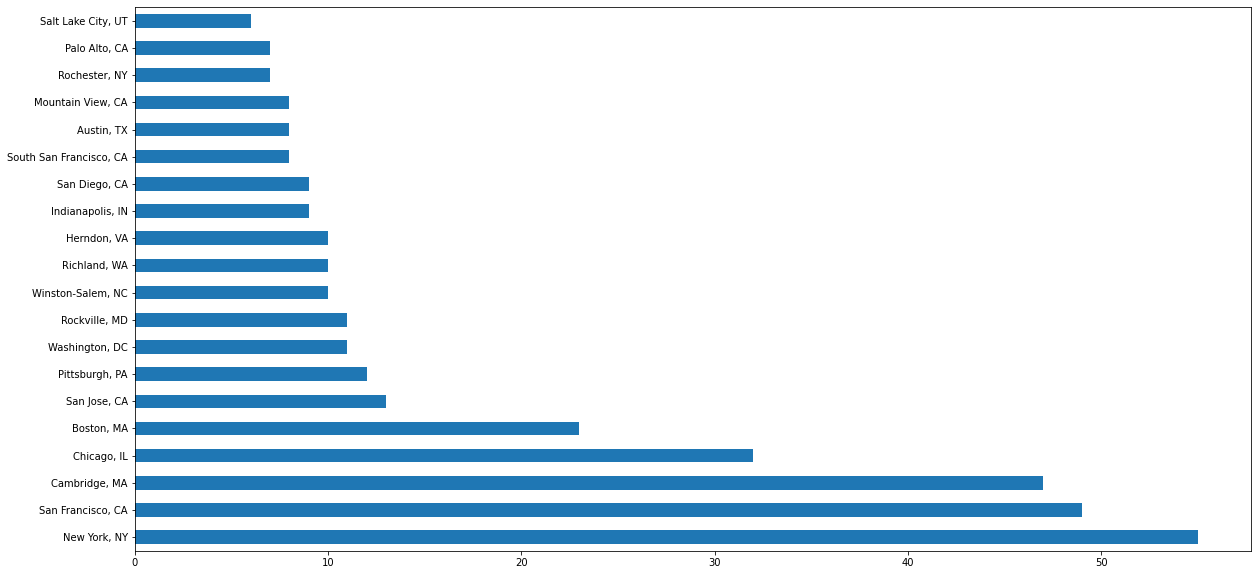

<IPython.core.display.Javascript object>

graph for headquarters total= 198


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

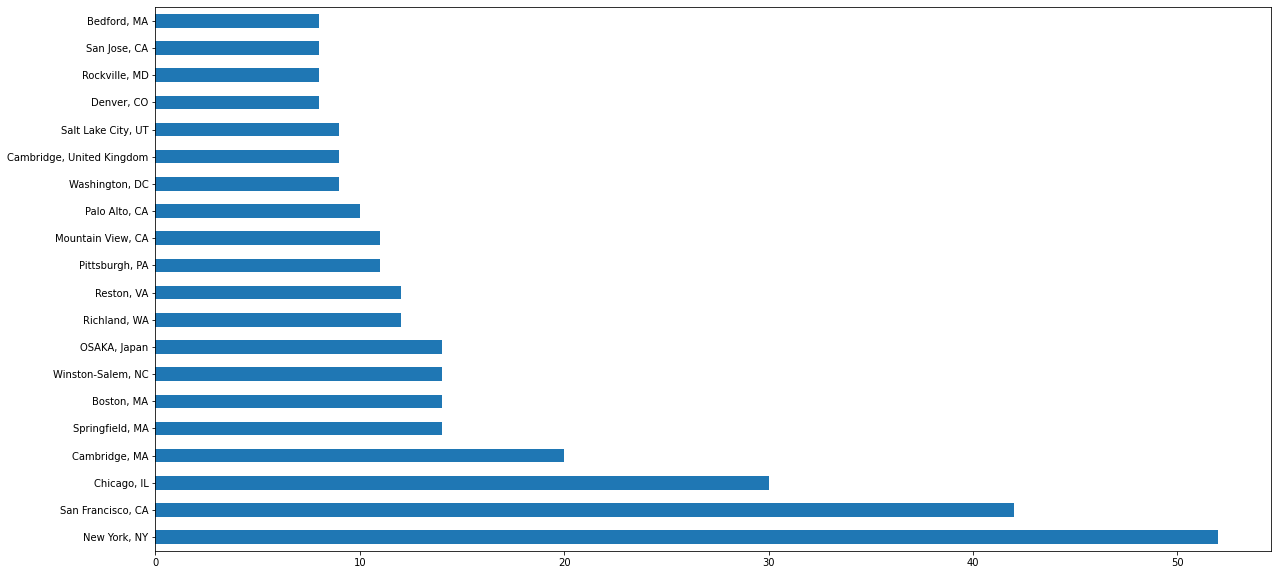

In [33]:
L=['company name','location','headquarters']
for feature in L :
    plt.figure(figsize=(20,10))
    print(f'graph for {feature} total= {df[feature].nunique()}')
    df[feature].value_counts().sort_values(ascending=False)[:20].plot(kind='barh')
    plt.yticks(rotation=0)
    plt.show();

In [34]:
# let's make some pivot tables

pd.pivot_table(df,index=['job_simp','seniority_level'],values='avg_salary')

avg_salary
job_simp       seniority_level            
MLE            na               119.958333
analyst        jr                53.250000
               na                61.270270
               sr                79.092593
data engineer  na                97.969512
               sr               123.638889
data scientist jr               106.500000
               na               110.525510
               sr               134.524390
director       na               168.607143
manager        na                84.022727
na             na                78.777778
               sr               112.220000

In [35]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
          data scientist   69.500000
          na              124.500000
CA        manager          80.611111
          data scientist  142.522059
          na              104.642857
          analyst          85.250000
          MLE             163.500000
          data engineer   129.540000
CO        MLE             100.500000
          analyst          29.500000
          data engineer    99.000000
          data scientist  108.666667
          na               31.500000
CT        data scientist   84.000000
          na               62.500000
DC        analyst          63.500000
          data engineer    85.000000
          data scientist  149.000000
DE        na               27.500000
FL        data engineer    91.833333
          data scientist   97.357143
          analyst          47.500000
GA        data scientist   81.333333
          na               80.000000
IA        analyst          43.000000
          data engineer   102.833333
ID        analyst          56.250000
IL        na               76.125000
          analyst          64.500000
          data engineer   101.500000
          data scientist  117.233333
          director        221.750000
IN        data scientist   84.500000
          na               69.000000
          data engineer   114.500000
KS        MLE              87.000000
KY        data scientist   84.000000
          na              103.500000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
MA        manager          71.900000
          director        117.833333
          na              107.478261
          data engineer   107.291667
          analyst          59.125000
          data scientist  113.750000
MD        data scientist  109.115385
          na               88.750000
          analyst          80.666667
          data engineer   109.000000
MI        data scientist  106.625000
          manager          87.500000
MN        analyst          76.000000
          data engineer    95.000000
MO        analyst          61.000000
          data scientist  127.666667
          manager          40.500000
          na               72.333333
NC        data engineer   104.250000
          data scientist  117.000000
          na               90.916667
NE        na               41.000000
NJ        analyst          83.583333
          data engineer   112.000000
          data scientist  106.875000
          director        161.500000
          manager         109.500000
          na               82.500000
NM        data scientist   74.333333
NY        MLE             125.000000
          analyst          65.607143
          data engineer    86.375000
          data scientist  115.250000
          na               81.583333
OH        data scientist  105.285714
          na               91.166667
          analyst          53.875000
OR        data engineer    73.000000
          data scientist   98.500000
PA        analyst          62.750000
          data engineer    91.500000
          data scientist  113.333333
          manager         109.666667
          na               96.800000
RI        analyst         100.000000
SC        na               60.500000
TN        analyst          13.500000
          data engineer   100.950000
          data scientist   96.000000
TX        data scientist  100.730769
          na               41.285714
          data engineer   113.062500
UT        analyst          54.750000
          data engineer   100.333333
          data scientist  140.500000
VA        MLE              87.000000
          analyst          71.583333
          data engineer    96.900000
          data scientist  108.416667
          na               79.300000
WA        analyst          54.

In [36]:
pd.pivot_table(df,index=['type of ownership','job_simp'],values='avg_salary').sort_values('type of ownership')

avg_salary
type of ownership              job_simp                  
-1                             na              117.500000
College / University           data scientist  105.500000
                               na              108.000000
Company - Private              MLE             143.500000
                               analyst          67.079365
                               data engineer   103.962500
                               data scientist  119.731544
                               director        172.900000
                               manager          85.133333
                               na               85.290698
Company - Public               manager         105.166667
                               director        157.875000
                               data scientist  120.522727
                               na              109.770833
                               analyst          69.125000
                               MLE              87.000000
                               data engineer   110.520000
Government                     data scientist   88.892857
                               na               20.000000
Hospital                       na               54.000000
Nonprofit Organization         na               52.250000
                               data scientist   92.950000
                               manager          64.000000
                               analyst          57.727273
                               data engineer    98.187500
Other Organization             analyst          72.500000
                               data scientist   87.500000
School / School District       analyst          59.500000
                               data scientist   96.000000
Subsidiary or Business Segment na              114.055556
                               analyst          54.666667
                               data engineer   123.800000
                               data scientist  127.571429
Unknown                        na               39.500000

In [37]:
# let's check the avg saary of data scientist in each state

pd.pivot_table(df[df.job_simp=='data scientist'],index='job_state',values='avg_salary').sort_values(by='avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [38]:
pd.pivot_table(df,index= 'rating', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
rating,
-1.0,136.181818
5.0,134.700000
2.5,120.000000
4.5,117.714286
4.1,116.368421
3.9,113.071429
2.6,109.083333
4.4,108.606061
3.2,105.500000


In [39]:
pivot_features=['rating', 'size','type of ownership', 'sector', 'revenue', 'job_state', 'python', 'R', 'spark', 'aws', 'excel', 'job_simp','seniority_level']

In [40]:
# let's check everything with avg_salary

for feature in pivot_features:
    print(f'{feature}')
    print(pd.pivot_table(df,index= feature, values = 'avg_salary').sort_values('avg_salary', ascending = False))

rating
        avg_salary
rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
size
                         avg_salary
size                               
Unknown                  128.111111
-1                       117.500000
10000+ employees         112.230769
51 to 200 employees      111.351064
1 to 50 employees        102.306452
201 to 500 employees     100.247863
5001 to 10000 employees   96.552632
1001 to 5000 employees    92.916667
5

In [41]:
df.to_csv(r'C:\Users\A S U S\Desktop\DS\Portfolio Project\Project2\eda_data.csv',index=False)